<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Загрузка-данных" data-toc-modified-id="Загрузка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Загрузка данных</a></span></li><li><span><a href="#Умножение-матриц" data-toc-modified-id="Умножение-матриц-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Умножение матриц</a></span></li><li><span><a href="#Алгоритм-преобразования" data-toc-modified-id="Алгоритм-преобразования-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Алгоритм преобразования</a></span></li><li><span><a href="#Проверка-алгоритма" data-toc-modified-id="Проверка-алгоритма-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Проверка алгоритма</a></span><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Подготовка данных</a></span></li><li><span><a href="#Обучение" data-toc-modified-id="Обучение-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Обучение</a></span></li></ul></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Вывод</a></span></li></ul></div>

# Защита персональных данных клиентов

Вам нужно защитить данные клиентов страховой компании «Хоть потоп». Разработайте такой метод преобразования данных, чтобы по ним было сложно восстановить персональную информацию. Обоснуйте корректность его работы.

Нужно защитить данные, чтобы при преобразовании качество моделей машинного обучения не ухудшилось. Подбирать наилучшую модель не требуется.

## Загрузка данных

In [1]:
import pandas as pd
import numpy as np

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from seaborn import heatmap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
try:
    data = pd.read_csv('/datasets/insurance.csv')
except:
    raise Exception('error')

In [3]:
data.head()

,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
0,1,41.0,49600.0,1,0
1,0,46.0,38000.0,1,1
2,0,29.0,21000.0,0,0
3,0,21.0,41700.0,2,0
4,1,28.0,26100.0,0,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Пол                5000 non-null   int64  
 1   Возраст            5000 non-null   float64
 2   Зарплата           5000 non-null   float64
 3   Члены семьи        5000 non-null   int64  
 4   Страховые выплаты  5000 non-null   int64  
dtypes: float64(2), int64(3)
memory usage: 195.4 KB


In [5]:
# проверим, есть ли пропуски
data.isna().sum().sum()

0

В итоге мы имеем датасет с 5000 объектами без пропусков, где кол-во страховых выплат является целевым признаком.

## Умножение матриц

Обозначения:

- $X$ — матрица признаков (нулевой столбец состоит из единиц)

- $y$ — вектор целевого признака

- $P$ — матрица, на которую умножаются признаки

- $w$ — вектор весов линейной регрессии (нулевой элемент равен сдвигу)

Предсказания:

$$
a = Xw
$$

Задача обучения:

$$
w = \arg\min_w MSE(Xw, y)
$$

Формула обучения:

$$
w = (X^T X)^{-1} X^T y
$$

**Ответ:** качество модели из-за преобразования не изменится.

**Обоснование:** воспользуемся умножением матриц, а также единичными и обратными матрицами.
Единичная матрица $E$ — это такая квадратная матрица, у которой по главной диагонали 1, а остальные нули. Если любую матрицу, например, А умножить на единичную, то получим первую без изменений.
$$AE = A$$
Обратная матрица $A^{-1}$ — это такая матрица, которая матрица, которая при умножении на исходную даст единичную независимо от порядка умножения:
$$AA^{-1} = A^{-1}A = E$$
Также нам потребуются свойства: $$(AB)^T = A^T B^T$$ $$(AB)^{-1} = A^{-1}B^{-1}$$
Соответственно, матрицы, для которых удается найти обратную, называются обратимыми. Мы можем умножить матрицу с исходными значениями $X$ на обратимую $P$ для кодирования исходной информации. Формула станет:
$$
I = XPw
$$

$$
w^` = ((IX)^T IX)^{-1} (IX)^T y
$$
Предсказания:
$$
a = Iw(I^TI)^{-1}y 
$$
Подставим и упростим выражения, пользуясь свойствами:
$$
a^` = I(I^TI)^{-1}y = XP((XP)^TXP)^{-1}(XP)^Ty = X(P^T X^T X P)^{-1} (XP)^Ty = X(P^T (X^T X) P)^{-1} P^T X^Ty = 
P^{-1} (X^T X)^{-1} (P^T)^{-1} P^T X^T y = XX^{-1}((X)^T)^{-1}(P^T)^{-1}X^TP^Ty = XX^{-1}(X^T)^{-1}EX^Ty = X(X^TX)^{-1}X^Ty = Xw
$$

По факту в конце преобразований мы получили исходную формулу $w = (X^T X)^{-1} X^T y$, что указывает на на то, что $w = w^`$, предсказания будут теми же, и качество не изменится при одинаковом $X$.

Посмотрим на отношение $w_p$ и $w$:
$$ XP w_p = X w $$
Умножим обе части на $P^{-1}$:
$$ XPw_p P^{-1} = Xw P^{-1}$$

Так как $PP^{-1} = E$, то
$$ XEw_p = Xw P^{-1} $$
$$ Xw_p = Xw P^{-1} $$
$$ w_p = w P^{-1} $$

А если $P$ изначально взять единичной, то будет такое выражение:
$$ XEw_p = Xw $$
$$ Xw_p = Xw $$
$$ w_p = w $$
но смысла в таком кодировании нет.

В итоге мы получили, что даже с умножением обратимой матрицы предсказания не должны поменяться.

## Алгоритм преобразования

**Алгоритм**

1. создадим квадратную обратимую матрицу с размерностью, равной кол-во признаков для обучения
2. проверим, что полученная матрица обратимая. Если нет, сгенирурем новую и еще раз проверим.
3. обучим две модели линейной регресии на одних и тех же данных, но в одном случае умножим матрицу признаков на полученную ранее матрицу перед обучением
4. сравним метрики R2, чтобы понять, оказало ли умножение матриц какое-либо влияние

**Обоснование**

Как мы выше показали, при умножении матрицы качество модели не должно существенно измениться. Если так и произойдет на одних и тех же данных, то можно считать, что алгоритм корректен.

## Проверка алгоритма

### Подготовка данных

Перед обучением моделей нам нужно произвести подготовку данных, а именно:
- проверить наличие сильной корреляции признаков
- выделить признаки и целевые признаки
- разбить на тренировочную и тестовую выборки
- скалировать значения
- подготовить обратимую матрицу

In [7]:
# выделяем признаки
features = data.drop('Страховые выплаты', axis=1)
target = data['Страховые выплаты']

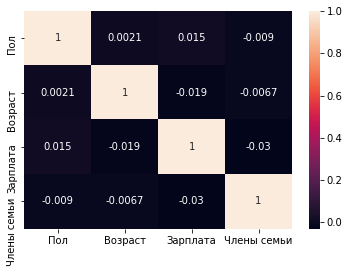

In [8]:
# проверяем корреляцию
heatmap(features.corr(), annot=True);

In [9]:
# обозначим рандом
RANDOM_STATE = 999

In [10]:
# разбиваем выборки
features_train, features_test, target_train, target_test = train_test_split(
    features, target, random_state=RANDOM_STATE, test_size=.25)

print(features_train.shape)
print(features_test.shape)
print(target_train.shape)
print(target_test.shape)

(3750, 4)
(1250, 4)
(3750,)
(1250,)


In [11]:
# скалируем значения, обучив на трейновой выборке
scaler = StandardScaler()
scaler.fit(features_train)
features_train_scaled = pd.DataFrame(scaler.transform(features_train))
features_test_scaled = pd.DataFrame(scaler.transform(features_test))

features_train_scaled.head()

,0,1,2,3
0,0.997869,-1.062860,-1.038101,0.729690
1,0.997869,-1.181253,-1.120189,-1.104317
2,-1.002136,-0.352497,1.660534,-1.104317
3,-1.002136,1.423408,-1.448540,-1.104317
4,-1.002136,0.594652,-0.586618,-1.104317


In [12]:
def get_random_inv_matrix(dim):
    matrix = np.random.rand(dim, dim)
    try:
        np.linalg.inv(matrix)
        return matrix
    except:
        get_random_inv_matrix(dim)

In [13]:
# создадим случайную матрицу
random_matrix = get_random_inv_matrix(features_train.shape[1])
random_matrix

array([[0.19980643, 0.79093817, 0.79546413, 0.04336677],
       [0.44319721, 0.0409752 , 0.33830446, 0.08951497],
       [0.58161789, 0.19624016, 0.97777499, 0.65471076],
       [0.19522433, 0.04611756, 0.97012421, 0.63702303]])

### Обучение

In [14]:
def train_linear_model(features_train, target_train, features_test, target_test, encoded=False):
    model = LinearRegression()
    if encoded:
        features_train = features_train @ random_matrix
        features_test = features_test @ random_matrix
    model.fit(features_train, target_train)
    predictions = model.predict(features_test)
    return r2_score(target_test, predictions)

In [15]:
print('R2 без кодирования', 
      train_linear_model(features_train_scaled, target_train, features_test_scaled, target_test))
print('R2 c кодированием ', 
      train_linear_model(features_train_scaled, target_train, features_test_scaled, target_test, encoded=True))

R2 без кодирования 0.40207079626868947
R2 c кодированием  0.40207079626868936


Как мы видим, полученные данные оказались практически неизменными. Из этого можно сделать вывод, что кодирование не оказало значимого влияния на качество обучения модели.

## Вывод

В ходе данного исследования мы проверяли возможность шифрования персональных данных клиентов, путем умножения матрицы признаков на квадратную обратимую матрицу. Таким образом мы можем получить другие данные, которые без декодирования постороннему человеку ничего не скажут. Мы математически обосновали, что умножение матрицы не окажет влияния на получаемые предсказания, а также придумали алгоритм сравнения моделей, где признаки кодировались и нет. В итоге мы реализовали алгоритм и практически подтвердили, что подобное кодирование не оказывает значимого влияния на качество моделей по метрике R2. 

Итого, данный метод можно применять для текущих моделей без потери качества.